# Maximum simultaneous processes study
In this notebook, we study the maximum number of simultaneously estimated processes supported by each solution.

## Import necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

from visualize import *
import seaborn as sns
import matplotlib.pyplot as plt

## PowerAPI study - 1
Study Smartwatts v28-02-2022 and PowerAPI v1.0.7

### Load experiment results

In [2]:

experiments_path = [
    'powerapi-max-process-number-gemini-1.lyon.grid5000.fr-2022-04-14-17_36_33',
    'powerapi-max-process-number-gemini-1.lyon.grid5000.fr-2022-04-14-18_07_07',
    'powerapi-max-process-number-gemini-1.lyon.grid5000.fr-2022-04-14-18_37_46',
    'powerapi-max-process-number-gemini-1.lyon.grid5000.fr-2022-04-14-19_11_19',
    'powerapi-max-process-number-gemini-1.lyon.grid5000.fr-2022-04-14-19_43_30',
    'powerapi-max-process-number-gemini-1.lyon.grid5000.fr-2022-04-14-20_14_06',
    'powerapi-max-process-number-gemini-1.lyon.grid5000.fr-2022-04-14-20_46_19',
    'powerapi-max-process-number-gemini-1.lyon.grid5000.fr-2022-04-14-21_18_26',
    'powerapi-max-process-number-gemini-1.lyon.grid5000.fr-2022-04-14-21_52_03',
    'powerapi-max-process-number-gemini-1.lyon.grid5000.fr-2022-04-14-22_25_49'
]

experiments_powerapi = []

for experiment_path in experiments_path:
    experiments_powerapi.append(parse_experiment("../results/%s" % experiment_path))

### Prepare data for plotting

In [3]:
# Result dataframe
result_df_plots = pd.DataFrame(columns=['timestamp', 'benchmark', 'plot_name', 'value', 'experiment'])

for experiment in experiments_powerapi[0]['experiments']:
    benchmarks_powerapi = convert_exp_into_benchmark_dataframes(experiments_powerapi, experiment['name'],'powerapi', 60)
    if benchmarks_powerapi is not None:
        for benchmark in benchmarks_powerapi:
            ## Get a list of powerapi dataframes
            experiments_powerapi_dataframes = list(map(lambda el: el['dataframe'], benchmarks_powerapi[benchmark]['powerapi']))
            ## Calculate a median value dataframe
            powerapi_median_values_df = calculate_median_values(experiments_powerapi_dataframes, ['timestamp', 'target', 'scope', 'socket'], 'power')
            
            ## Create a plottable dataframe for power api
            result_df_plot_powerapi = create_plottable_df_for_powerapi(powerapi_median_values_df, str(benchmark), targets=['rapl', 'process'])

            result_df_plot_powerapi['experiment'] = experiment['name']

            # Add plottable dataframe to result dataframe
            result_df_plots = pd.concat([result_df_plots,result_df_plot_powerapi], ignore_index=True)
    
result_df_plots

,timestamp,benchmark,plot_name,value,experiment
0,0 days 00:00:00,4 Parallel EP NAS Benchmarks,powerapi_rapl_cpu,141.812256,powerapi-4-processes
1,0 days 00:00:01,4 Parallel EP NAS Benchmarks,powerapi_rapl_cpu,141.712067,powerapi-4-processes
2,0 days 00:00:02,4 Parallel EP NAS Benchmarks,powerapi_rapl_cpu,141.684967,powerapi-4-processes
3,0 days 00:00:03,4 Parallel EP NAS Benchmarks,powerapi_rapl_cpu,141.601990,powerapi-4-processes
4,0 days 00:00:04,4 Parallel EP NAS Benchmarks,powerapi_rapl_cpu,141.636780,powerapi-4-processes
...,...,...,...,...,...
7680,0 days 00:00:01,6 Parallel EP NAS Benchmarks,powerapi_process_6_cpu,0.000000,powerapi-6-processes
7681,0 days 00:00:00,6 Parallel EP NAS Benchmarks,powerapi_process_6_dram,0.000000,powerapi-6-processes
7682,0 days 00:00:01,6 Parallel EP NAS Benchmarks,powerapi_process_6_dram,0.000000,powerapi-6-processes
7683,0 days 00:00:00,6 Parallel EP NAS Benchmarks,powerapi_process_6_total,0.000000,powerapi-6-processes


### Plot by process power profiles

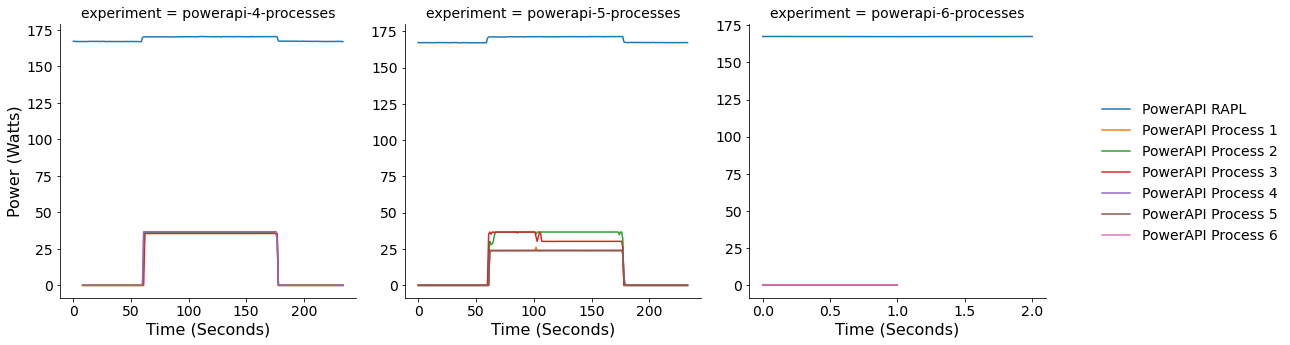

In [4]:
result_df_plots['timestamp_sec'] = result_df_plots['timestamp'].dt.total_seconds()
plt.rcParams.update({'font.size': 14})
grid = sns.relplot(
    data=result_df_plots,
    x="timestamp_sec", y="value",
    hue="plot_name", col="experiment",
    kind="line",
    facet_kws={'sharex': False, 'sharey': False},
    hue_order=['powerapi_rapl_total', *[f"powerapi_process_{x+1}_total" for x in range(6)]]
)
grid.set_xlabels('Time (Seconds)', fontsize="16")
grid.set_ylabels('Power (Watts)', fontsize="16")

# Change legend texts
grid.legend.set_title(None)
for t, l in zip(grid.legend.texts, ['PowerAPI RAPL', *[f"PowerAPI Process {x+1}" for x in range(6)]]):
    t.set_text(l)

grid.savefig('../figures/powerapi_max_processes.pdf')
grid.savefig('../figures/powerapi_max_processes.png')

## PowerAPI study - 2
Study Smartwatts v0.9.2 and PowerAPI v1.1.0

### Load experiment results

In [5]:
experiments_path = [
    'powerapi-max-process-number-gemini-1.lyon.grid5000.fr-2022-09-28-13_28_29',
    'powerapi-max-process-number-new-gemini-1.lyon.grid5000.fr-2023-02-01-12_27_58',
    'powerapi-max-process-number-new-gemini-1.lyon.grid5000.fr-2023-02-01-11_58_07'
]

experiments_powerapi = []

for experiment_path in experiments_path:
    experiments_powerapi.append(parse_experiment("../results/%s" % experiment_path))

In [6]:
# Result dataframe
result_df_plots = pd.DataFrame(columns=['timestamp', 'benchmark', 'plot_name', 'value', 'experiment'])

for experiment in experiments_powerapi[0]['experiments']:
    benchmarks_powerapi = convert_exp_into_benchmark_dataframes(experiments_powerapi, experiment['name'],'powerapi', 60)
    if benchmarks_powerapi is not None:
        for benchmark in benchmarks_powerapi:
            ## Get a list of powerapi dataframes
            experiments_powerapi_dataframes = list(map(lambda el: el['dataframe'], benchmarks_powerapi[benchmark]['powerapi']))
            ## Calculate a median value dataframe
            powerapi_median_values_df = calculate_median_values(experiments_powerapi_dataframes, ['timestamp', 'target', 'scope', 'socket'], 'power')
            
            ## Create a plottable dataframe for power api
            result_df_plot_powerapi = create_plottable_df_for_powerapi(powerapi_median_values_df, str(benchmark), targets=['rapl', 'process'])

            result_df_plot_powerapi['experiment'] = experiment['name']

            # Add plottable dataframe to result dataframe
            result_df_plots = pd.concat([result_df_plots,result_df_plot_powerapi], ignore_index=True)
    
result_df_plots

,timestamp,benchmark,plot_name,value,experiment
0,0 days 00:00:00,4 Parallel EP NAS Benchmarks,powerapi_rapl_cpu,139.997375,powerapi-4-processes
1,0 days 00:00:01,4 Parallel EP NAS Benchmarks,powerapi_rapl_cpu,139.891541,powerapi-4-processes
2,0 days 00:00:02,4 Parallel EP NAS Benchmarks,powerapi_rapl_cpu,139.955444,powerapi-4-processes
3,0 days 00:00:03,4 Parallel EP NAS Benchmarks,powerapi_rapl_cpu,139.932129,powerapi-4-processes
4,0 days 00:00:04,4 Parallel EP NAS Benchmarks,powerapi_rapl_cpu,140.004028,powerapi-4-processes
...,...,...,...,...,...
73780,0 days 00:03:24,20 Parallel EP NAS Benchmarks,powerapi_process_21_total,0.000000,powerapi-20-processes
73781,0 days 00:03:25,20 Parallel EP NAS Benchmarks,powerapi_process_21_total,0.000000,powerapi-20-processes
73782,0 days 00:03:26,20 Parallel EP NAS Benchmarks,powerapi_process_21_total,0.000000,powerapi-20-processes
73783,0 days 00:03:27,20 Parallel EP NAS Benchmarks,powerapi_process_21_total,0.000000,powerapi-20-processes


### Plot by process power profiles

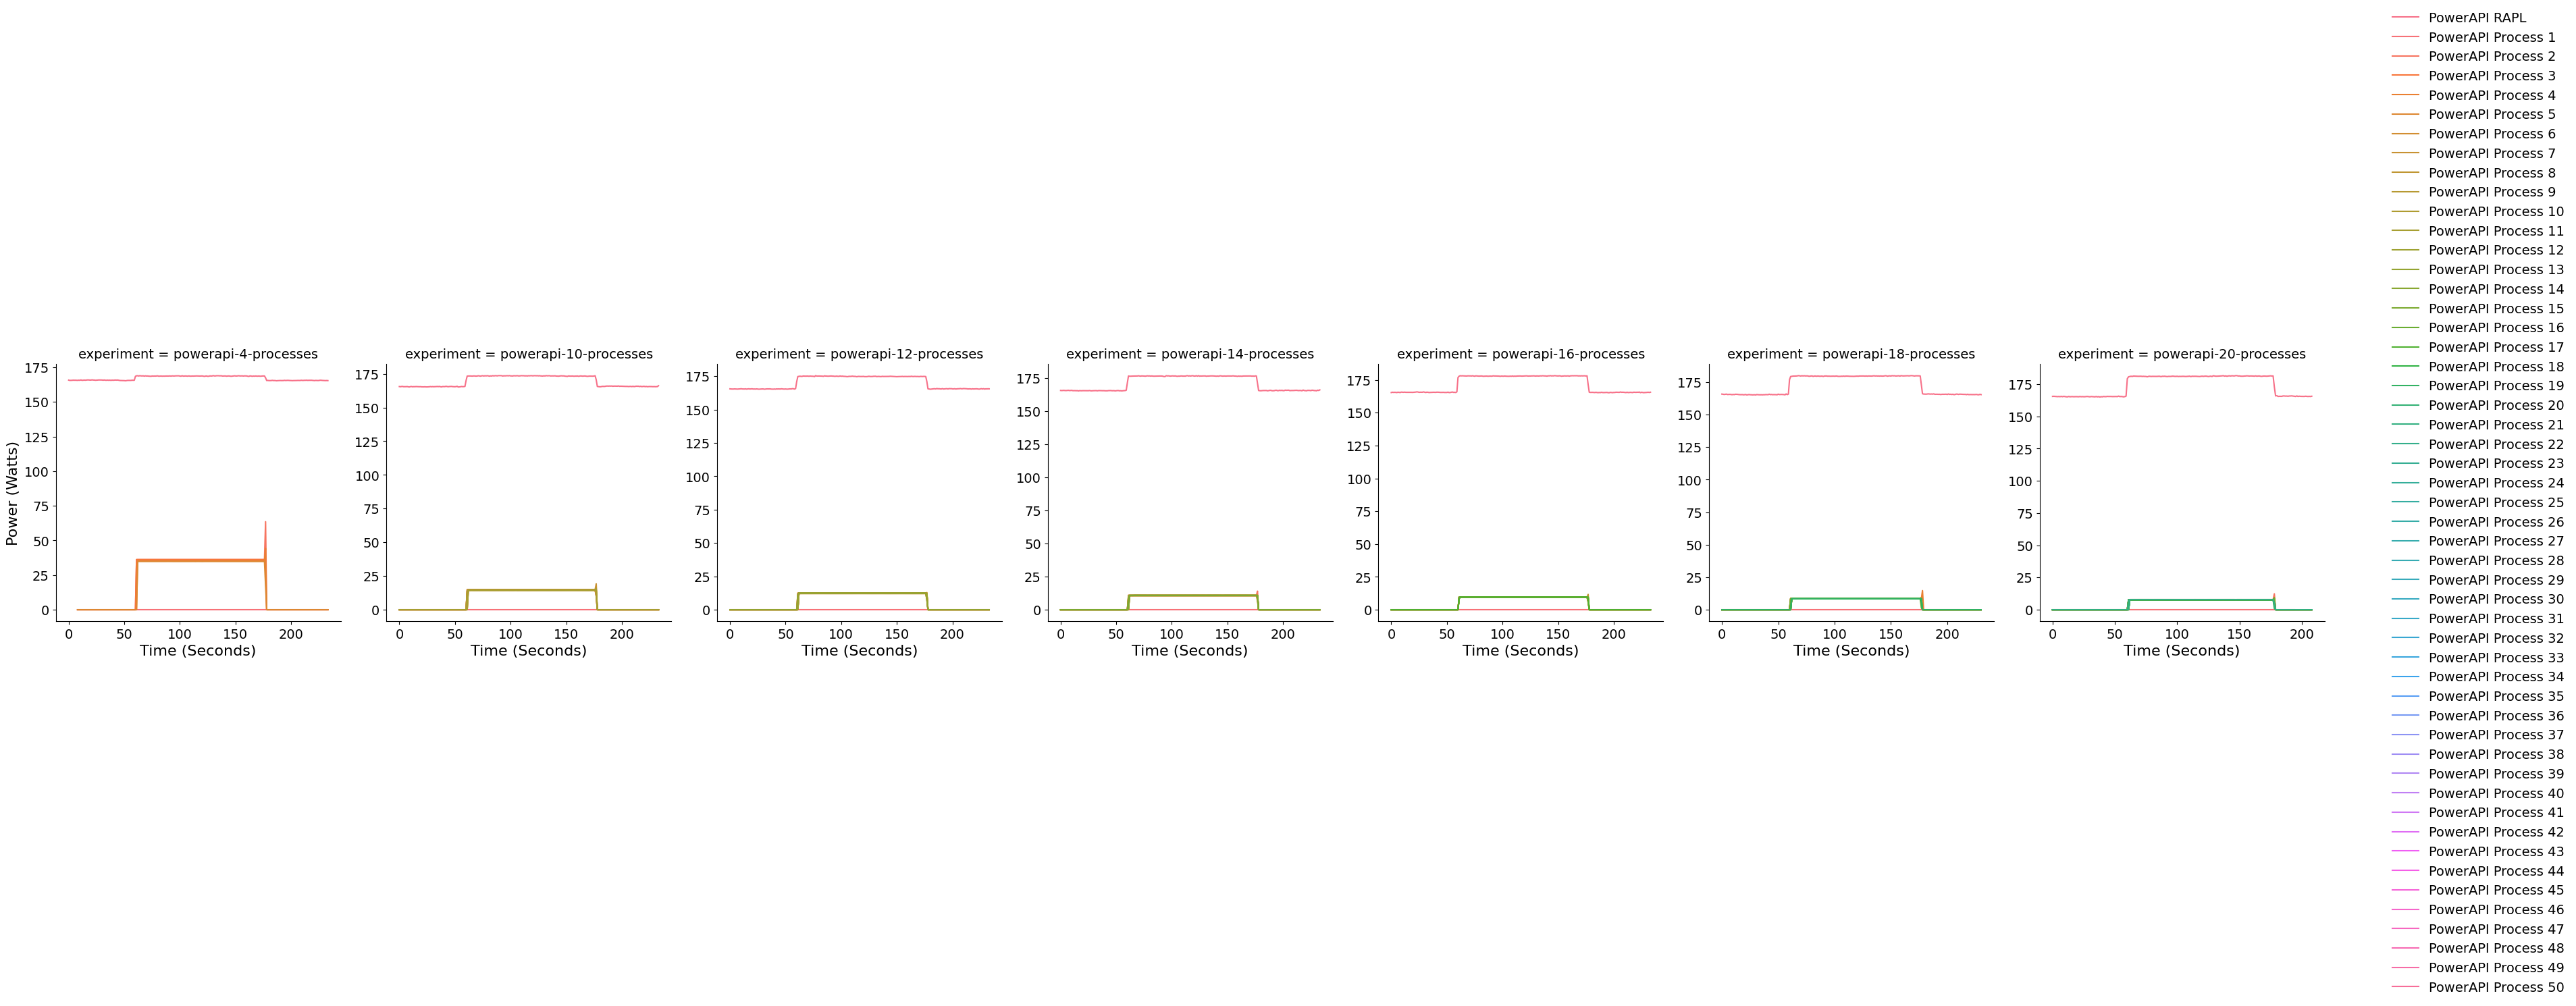

In [7]:
result_df_plots['timestamp_sec'] = result_df_plots['timestamp'].dt.total_seconds()
plt.rcParams.update({'font.size': 14})
grid = sns.relplot(
    data=result_df_plots,
    x="timestamp_sec", y="value",
    hue="plot_name", col="experiment",
    kind="line",
    facet_kws={'sharex': False, 'sharey': False},
    hue_order=['powerapi_rapl_total', *[f"powerapi_process_{x+1}_total" for x in range(50)]]
)
grid.set_xlabels('Time (Seconds)', fontsize="16")
grid.set_ylabels('Power (Watts)', fontsize="16")

# Change legend texts
grid.legend.set_title(None)
for t, l in zip(grid.legend.texts, ['PowerAPI RAPL', *[f"PowerAPI Process {x+1}" for x in range(50)]]):
    t.set_text(l)

grid.savefig('../figures/powerapi_max_processes_0_9_2.pdf')
grid.savefig('../figures/powerapi_max_processes_0_9_2.png')

## Scaphandre study

### Load experiment results

In [8]:
experiments_path = [
    'scaphandre-max-process-number-gemini-1.lyon.grid5000.fr-2022-04-13-01_44_33',
    'scaphandre-max-process-number-gemini-1.lyon.grid5000.fr-2022-04-13-02_26_33',
    'scaphandre-max-process-number-gemini-1.lyon.grid5000.fr-2022-04-13-03_08_33',
    'scaphandre-max-process-number-gemini-1.lyon.grid5000.fr-2022-04-13-03_50_26',
    'scaphandre-max-process-number-gemini-1.lyon.grid5000.fr-2022-04-13-04_32_25',
    'scaphandre-max-process-number-gemini-1.lyon.grid5000.fr-2022-04-14-22_56_36',
    'scaphandre-max-process-number-gemini-1.lyon.grid5000.fr-2022-04-14-23_26_46',
    'scaphandre-max-process-number-gemini-1.lyon.grid5000.fr-2022-04-14-23_56_57',
    'scaphandre-max-process-number-gemini-1.lyon.grid5000.fr-2022-04-15-00_26_58',
    'scaphandre-max-process-number-gemini-1.lyon.grid5000.fr-2022-04-15-00_57_15'
]

experiments_scaphandre = []

for experiment_path in experiments_path:
    experiments_scaphandre.append(parse_experiment("../results/%s" % experiment_path))

# Additional processing is required for Scaphandre dataframes
# Scaphandre by component result dataframes will be joined into a single dataframe
process_scaphandre_dataframes_process(experiments_scaphandre)

### Prepare data for plotting

In [9]:
# Result dataframe
result_df_plots = pd.DataFrame(columns=['timestamp', 'benchmark', 'plot_name', 'value', 'experiment'])

for experiment in experiments_scaphandre[0]['experiments']:
    
    benchmarks_scaphandre = convert_exp_into_benchmark_dataframes(experiments_scaphandre, experiment['name'], 'scaphandre', 60)
    
    if benchmarks_scaphandre is not None:
        for benchmark in benchmarks_scaphandre:
            ## Get a list of scaphandre dataframes
            experiments_scaphandre_dataframes = list(map(lambda el: el['dataframe'], benchmarks_scaphandre[benchmark]['scaphandre']))
            ## Calculate a median value dataframe
            scaphandre_median_values_df = calculate_median_values(experiments_scaphandre_dataframes, ['timestamp', 'target'], 'value', timestamp_floor='5s')
            ## Create a plottable dataframe for power api
            result_df_plot_scaphandre = create_plottable_df_for_scaphandre(scaphandre_median_values_df, str(benchmark))
        
            result_df_plot_scaphandre['experiment'] = experiment['name']

            # Add plottable dataframe to result dataframe
            result_df_plots = pd.concat([result_df_plots,result_df_plot_scaphandre], ignore_index=True)
    
result_df_plots

,timestamp,benchmark,plot_name,value,experiment
0,0 days 00:00:00,5 Parallel EP NAS Benchmarks,scaphandre_host,141.951170,scaphandre-5-processes
1,0 days 00:00:05,5 Parallel EP NAS Benchmarks,scaphandre_host,141.944103,scaphandre-5-processes
2,0 days 00:00:10,5 Parallel EP NAS Benchmarks,scaphandre_host,141.926617,scaphandre-5-processes
3,0 days 00:00:15,5 Parallel EP NAS Benchmarks,scaphandre_host,141.913190,scaphandre-5-processes
4,0 days 00:00:20,5 Parallel EP NAS Benchmarks,scaphandre_host,141.864520,scaphandre-5-processes
...,...,...,...,...,...
16440,0 days 00:07:20,100 Parallel EP NAS Benchmarks,scaphandre_process_100_cpu,0.000000,scaphandre-100-processes
16441,0 days 00:07:25,100 Parallel EP NAS Benchmarks,scaphandre_process_100_cpu,0.000000,scaphandre-100-processes
16442,0 days 00:07:30,100 Parallel EP NAS Benchmarks,scaphandre_process_100_cpu,0.000000,scaphandre-100-processes
16443,0 days 00:07:35,100 Parallel EP NAS Benchmarks,scaphandre_process_100_cpu,0.000000,scaphandre-100-processes


### Plot by process power profiles

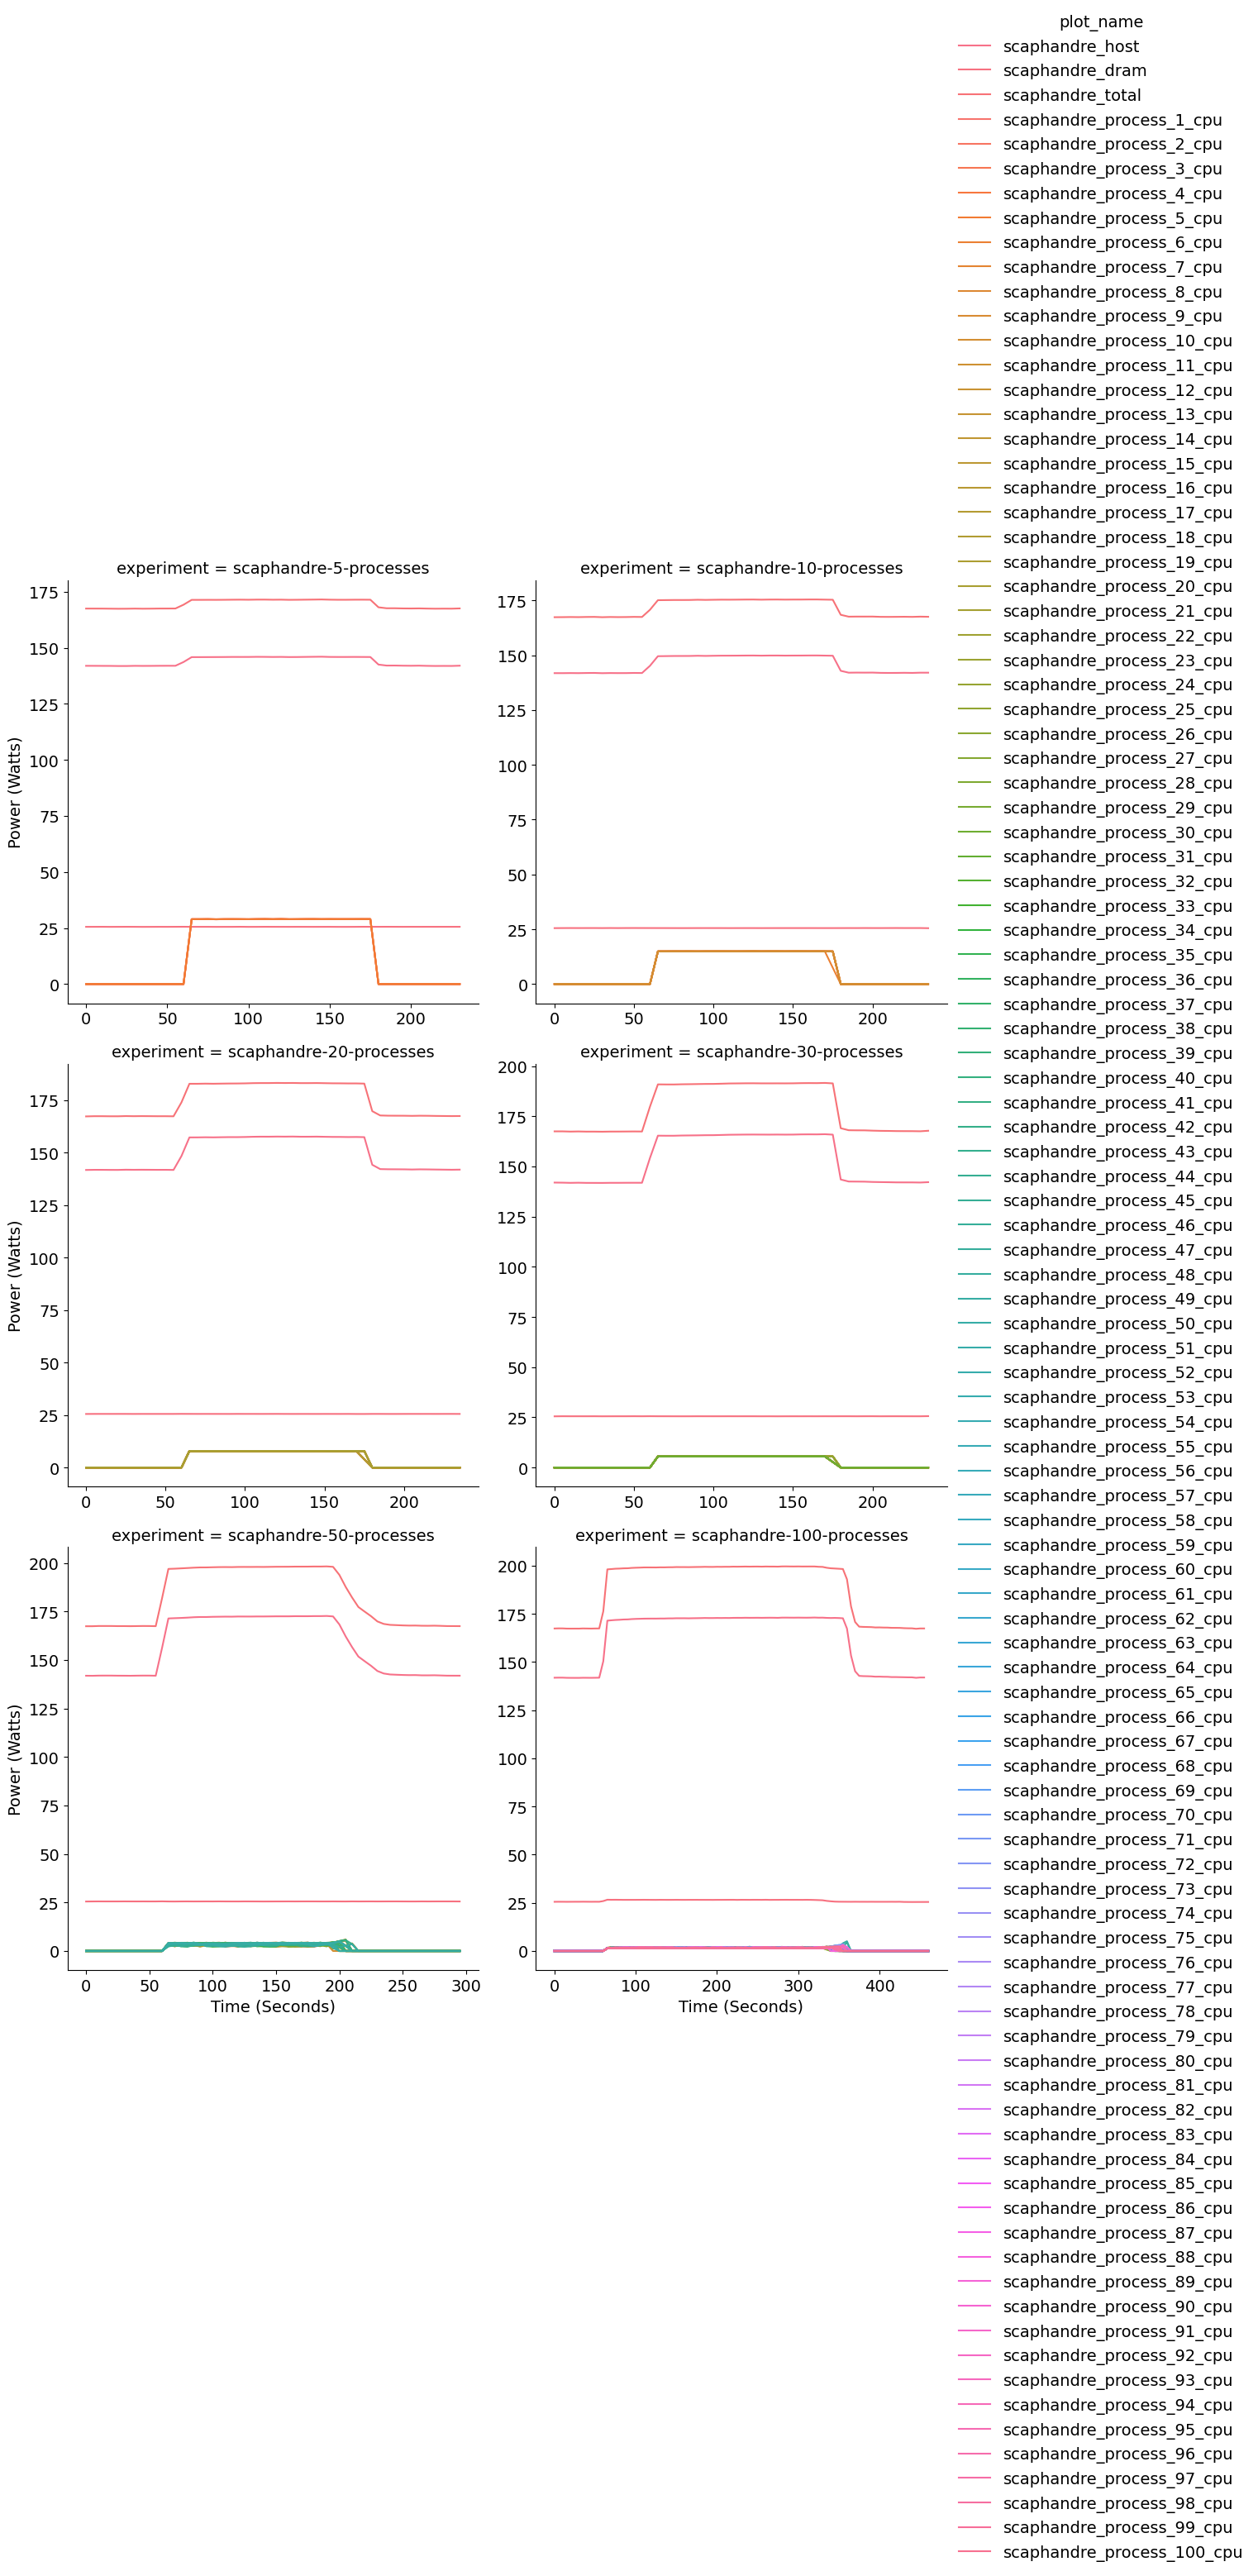

In [10]:

result_df_plots = result_df_plots.copy()
result_df_plots['timestamp_sec'] = result_df_plots['timestamp'].dt.total_seconds()
grid = sns.relplot(
    data=result_df_plots,
    x="timestamp_sec", y="value",
    hue="plot_name", col="experiment",
    kind="line",
    height=6,
    col_wrap=2,
    facet_kws={'sharex': False, 'sharey': False}
)
grid.set_xlabels('Time (Seconds)')
grid.set_ylabels('Power (Watts)')